In [1]:
import pandas as pd
df = pd.read_csv('Data/Stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [3]:
print("Raw Counts")
print(df['stroke'].value_counts())
print()
print('Percentages')
print(df['stroke'].value_counts(normalize=True))

Raw Counts
0    4861
1     249
Name: stroke, dtype: int64

Percentages
0    0.951272
1    0.048728
Name: stroke, dtype: float64


<AxesSubplot:xlabel='stroke', ylabel='count'>

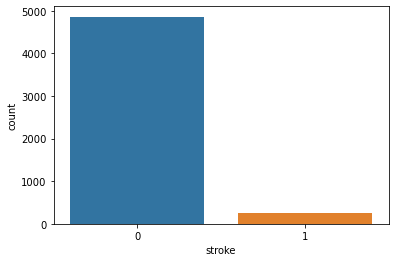

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(df['stroke'])

In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'] = df['bmi'].fillna(df.bmi.mean())
df['bmi'] = df['bmi'].round(decimals=1)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.groupby('stroke').mean()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,,
0,36487.236371,41.971545,0.088871,0.047110,104.795513,28.825612
1,37115.068273,67.728193,0.265060,0.188755,132.544739,30.218876


In [8]:
"""The mean age of people with stroke is around 67 years, they more likely to have hypertension and heart disease, their average glucose level and bmi is higher"""

'The mean age of people with stroke is around 67 years, they more likely to have hypertension and heart disease, their average glucose level and bmi is higher'

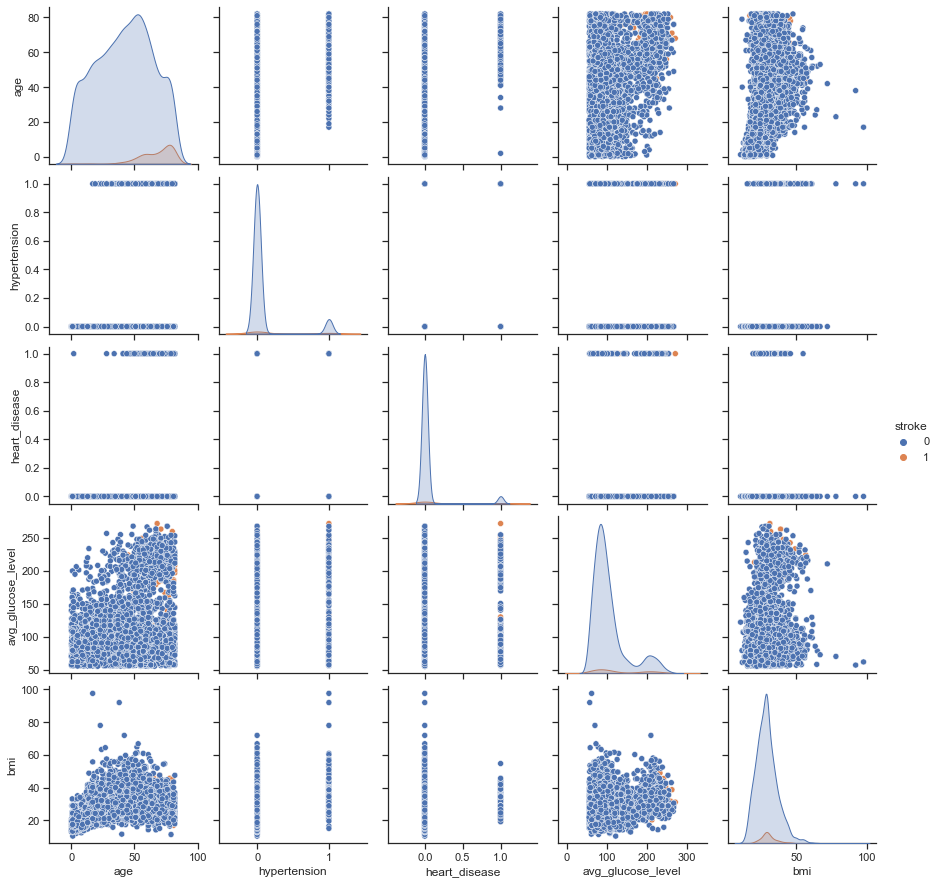

In [9]:
sns.set(style = 'ticks', color_codes=True)
sns.pairplot(data=df, hue='stroke',  
             vars=['age',
                   'hypertension',
                   'heart_disease',
                   'avg_glucose_level',
                   'bmi']);

Percentage of Stroke Occurence Based on Gender:
gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64



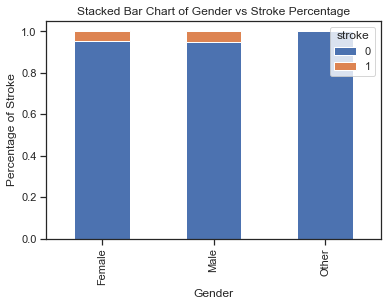

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Percentage of Stroke Occurence Based on Gender:")
print(df.groupby('gender')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.gender, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs Stroke Percentage')
plt.xlabel('Gender')
plt.ylabel('Percentage of Stroke')
plt.savefig('gender_vs_stroke')

Percentage of Stroke Occurence Based on Marital Status:
ever_married
No     1.650541
Yes    6.561288
Name: stroke, dtype: float64



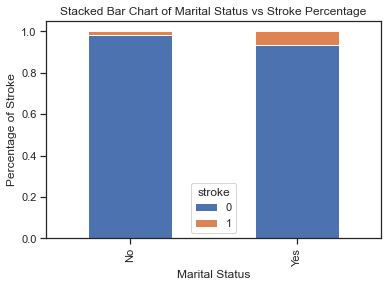

In [11]:
print("Percentage of Stroke Occurence Based on Marital Status:")
print(df.groupby('ever_married')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.ever_married, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Stroke Percentage')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Stroke')
plt.savefig('marriage_vs_stroke')

Percentage of Stroke Occurence Based on Work Type:
work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64



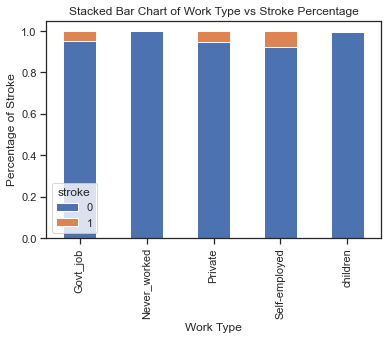

In [12]:
print("Percentage of Stroke Occurence Based on Work Type:")
print(df.groupby('work_type')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.work_type, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Work Type vs Stroke Percentage')
plt.xlabel('Work Type')
plt.ylabel('Percentage of Stroke')
plt.savefig('work_vs_stroke')

Percentage of Stroke Occurence Based on Residence Type:
Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64



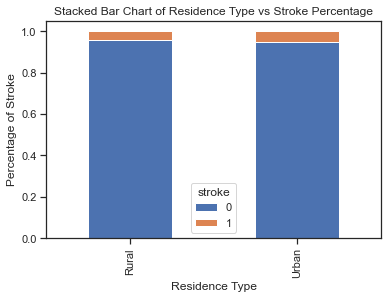

In [13]:
print("Percentage of Stroke Occurence Based on Residence Type:")
print(df.groupby('Residence_type')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.Residence_type, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Residence Type vs Stroke Percentage')
plt.xlabel('Residence Type')
plt.ylabel('Percentage of Stroke')
plt.savefig('residence_vs_stroke')

Percentage of Stroke Occurence Based on Smoking Status:
smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64



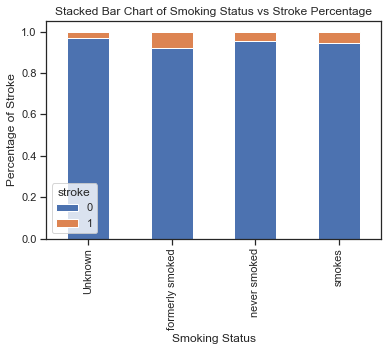

In [14]:
print("Percentage of Stroke Occurence Based on Smoking Status:")
print(df.groupby('smoking_status')['stroke'].mean() * 100)
print()
table = pd.crosstab(df.smoking_status, df.stroke)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Smoking Status vs Stroke Percentage')
plt.xlabel('Smoking Status')
plt.ylabel('Percentage of Stroke')
plt.savefig('smoking_vs_stroke')

In [15]:
"""As seen from the abpve charts, the parameters that influence on whether a person will have a stroke are: marital status, work type and smoking status"""

'As seen from the abpve charts, the parameters that influence on whether a person will have a stroke are: marital status, work type and smoking status'

In [16]:
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1, 'Other': 2}).astype('int8')
df['ever_married'] = df['ever_married'].replace({'No': 0, 'Yes': 1}).astype('int8')
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1}).astype('int8')

In [17]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,0,228.69,36.6,1,0,0,1,0,0,0,1,0,0
1,51676,0,61.0,0,0,1,1,202.21,28.9,1,0,0,0,1,0,0,0,1,0
2,31112,1,80.0,0,1,1,1,105.92,32.5,1,0,0,1,0,0,0,0,1,0
3,60182,0,49.0,0,0,1,0,171.23,34.4,1,0,0,1,0,0,0,0,0,1
4,1665,0,79.0,1,0,1,1,174.12,24.0,1,0,0,0,1,0,0,0,1,0


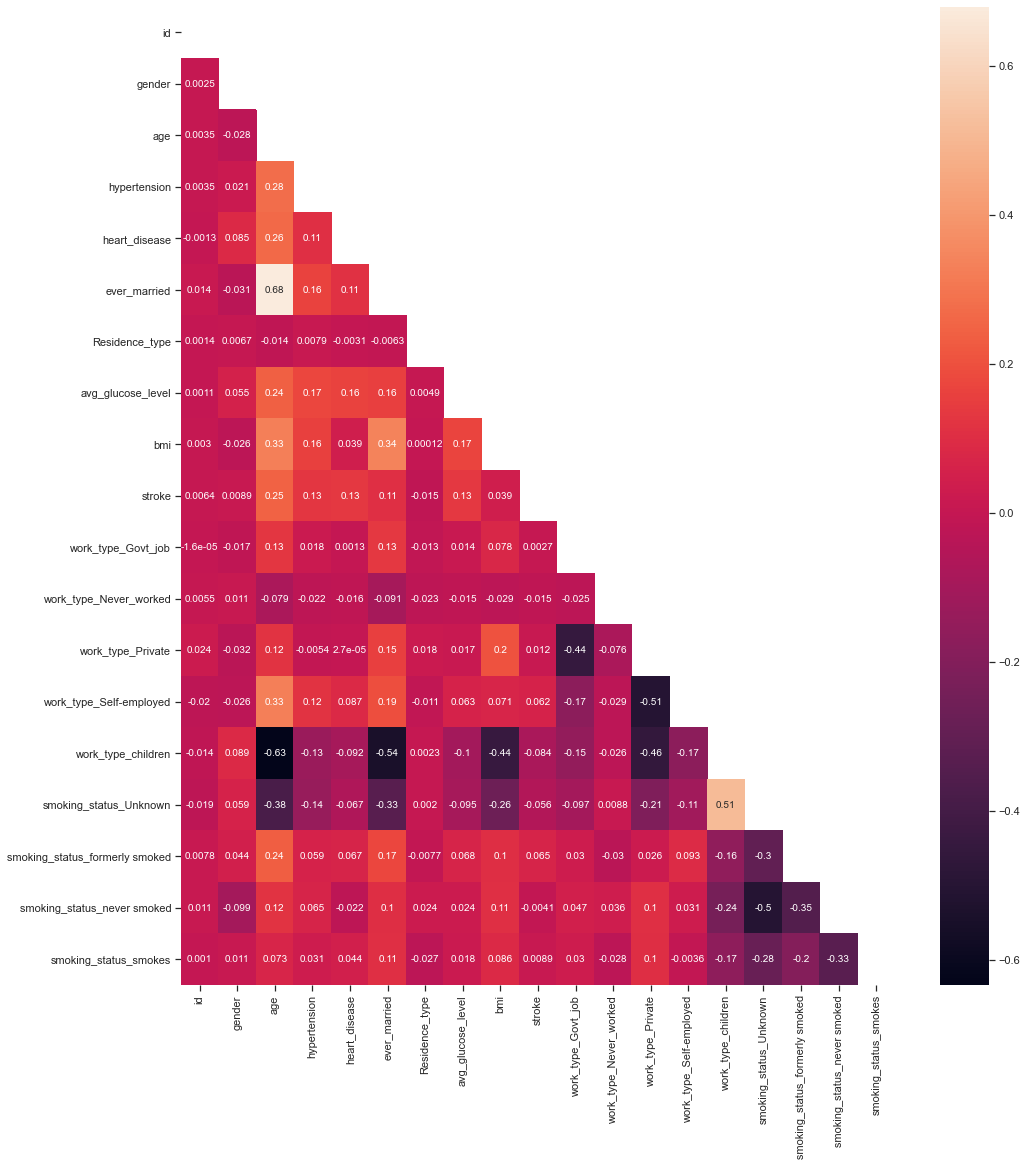

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
corr = df.corr()
fig, ax = plt.subplots(figsize = (16, 18))
sns.heatmap(data = corr, 
            mask = np.triu(np.ones_like(corr, dtype = bool)), 
            ax = ax, 
            annot = True);

In [19]:
y = df['stroke']
X = df.drop(columns=['id', 'stroke'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

0    3645
1     187
Name: stroke, dtype: int64 

 0    1216
1      62
Name: stroke, dtype: int64


In [21]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print(y_train_resampled.value_counts())

1    3645
0    3645
Name: stroke, dtype: int64


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

baseline_model = LogisticRegression(random_state=42)
baseline_neg_log_loss_cv = -cross_val_score(
    baseline_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
baseline_neg_log_loss_cv.mean()

0.20198407870944793

In [23]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

def print_metrics(labels, preds):
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [24]:
baseline_model.fit(X_train_resampled, y_train_resampled)
preds = baseline_model.predict(X_test)
print("Logistic Regression Baseline Model:")
print_metrics(y_test, preds)

Logistic Regression Baseline Model:
Accuracy Score: 0.9006259780907668
Precision Score: 0.19626168224299065
Recall Score: 0.3387096774193548
F1 Score: 0.24852071005917162


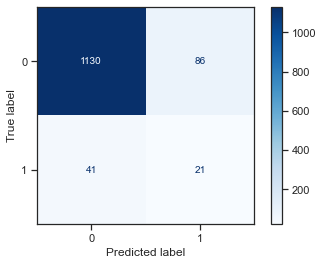

In [25]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(baseline_model, X_test, y_test, cmap = plt.cm.Blues);

In [26]:
features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'ever_married',
            'work_type_Self-employed', 'smoking_status_formerly smoked']
X_train_model = X_train_resampled[features]
X_test_model = X_test[features]

In [27]:
logreg_model = LogisticRegression(random_state=42)
logreg_neg_log_loss_cv = -cross_val_score(
    logreg_model,
    X_train_model,
    y_train_resampled,
    scoring='neg_log_loss')
logreg_neg_log_loss_cv.mean()

0.40658175649996775

In [28]:
logreg_model.fit(X_train_model, y_train_resampled)
preds = logreg_model.predict(X_test_model)
print("Logistic Regression Model with Features:")
print_metrics(y_test, preds)

Logistic Regression Model with Features:
Accuracy Score: 0.7668231611893583
Precision Score: 0.11437908496732026
Recall Score: 0.5645161290322581
F1 Score: 0.1902173913043478


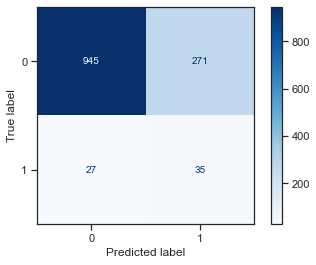

In [29]:
plot_confusion_matrix(logreg_model, X_test_model, y_test, cmap = plt.cm.Blues);

In [30]:
from sklearn.model_selection import GridSearchCV
logreg_tuned_model = LogisticRegression(random_state=42)
param_grid = {'penalty' : ['l1', 'l2', 'elasticnet'],
              'solver' : ['liblinear', 'saga']}
    
grid_search = GridSearchCV(estimator = logreg_tuned_model,
                           param_grid = param_grid,
                           cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']})

In [31]:
grid_search.best_params_

{'penalty': 'l1', 'solver': 'liblinear'}

In [32]:
logreg_tuned_model = LogisticRegression(random_state=42,
                                       penalty='l2',
                                       solver='liblinear')
logreg_tuned_neg_log_loss_cv = -cross_val_score(
    logreg_tuned_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
logreg_tuned_neg_log_loss_cv.mean()

0.19410793330582637

In [33]:
logreg_tuned_model.fit(X_train_resampled, y_train_resampled)
preds = logreg_tuned_model.predict(X_test)
print("Logistic Regression Tuned Model:")
print_metrics(y_test, preds)

Logistic Regression Tuned Model:
Accuracy Score: 0.9092331768388107
Precision Score: 0.2127659574468085
Recall Score: 0.3225806451612903
F1 Score: 0.2564102564102564


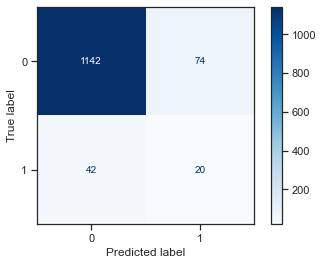

In [34]:
plot_confusion_matrix(logreg_tuned_model, X_test, y_test, cmap = plt.cm.Blues);

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_baseline_model = DecisionTreeClassifier(random_state=42)
dt_baseline_neg_log_loss_cv = -cross_val_score(
    dt_baseline_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
dt_baseline_neg_log_loss_cv.mean()

2.018343955989196

In [36]:
dt_baseline_model.fit(X_train_resampled, y_train_resampled)
preds = dt_baseline_model.predict(X_test)
print("Decision Tree Baseline Model:")
print_metrics(y_test, preds)

Decision Tree Baseline Model:
Accuracy Score: 0.9014084507042254
Precision Score: 0.15217391304347827
Recall Score: 0.22580645161290322
F1 Score: 0.1818181818181818


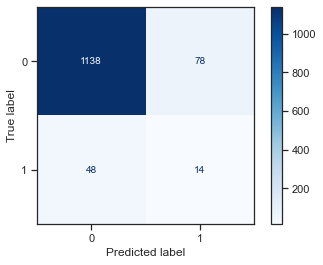

In [37]:
plot_confusion_matrix(dt_baseline_model, X_test, y_test, cmap = plt.cm.Blues);

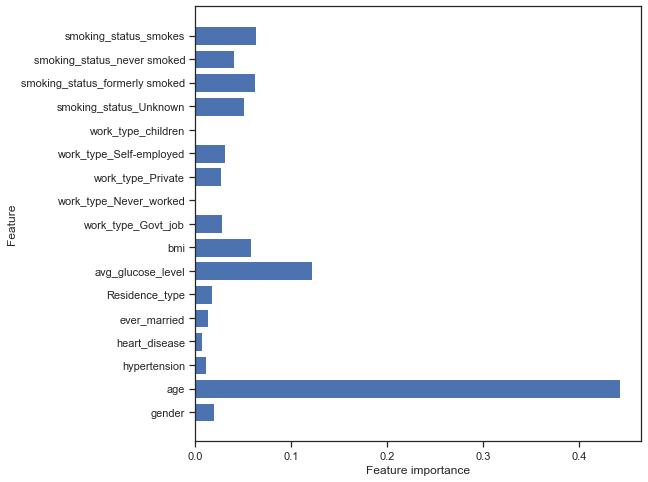

In [38]:
def plot_feature_importances(model):
    n_features = X_train_resampled.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train_resampled.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel('Feature')
    
plot_feature_importances(dt_baseline_model)

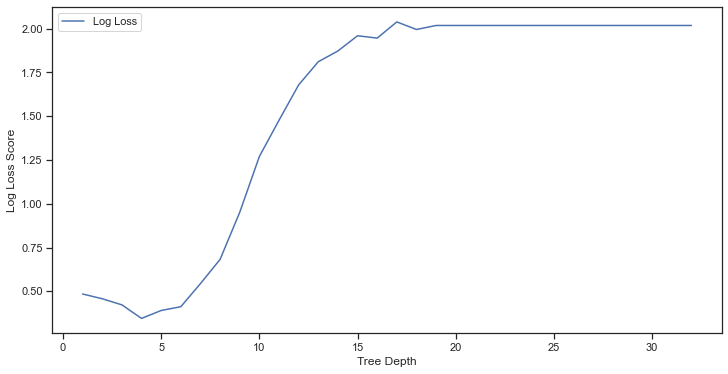

In [39]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
log_loss_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_depths, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Tree Depth")
plt.legend()
plt.show()

In [40]:
"""max depths of 5 is the best parameter"""

'max depths of 5 is the best parameter'

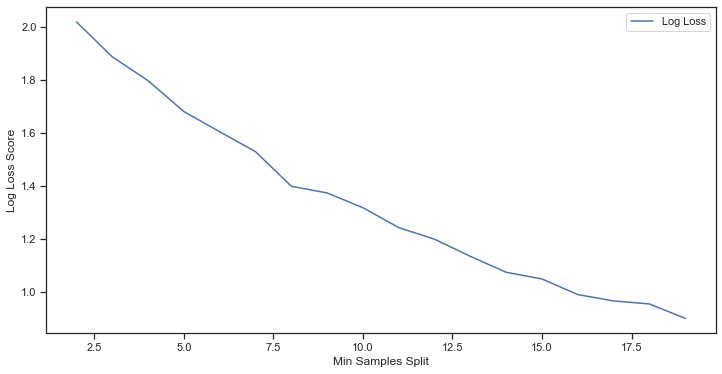

In [41]:
min_samples_splits = np.arange(2, 20)
log_loss_results = []
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(
        min_samples_split=int(min_samples_split),
        random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_splits, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Min Samples Split")
plt.legend()
plt.show()

In [42]:
"""min samples split of 16 is the best parameter"""

'min samples split of 16 is the best parameter'

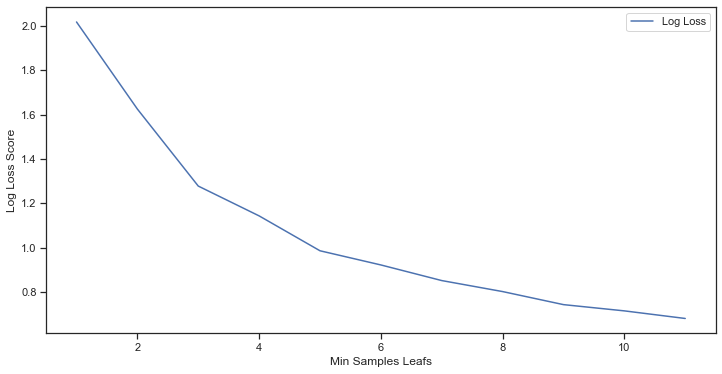

In [43]:
min_samples_leafs = np.arange(1, 12)
log_loss_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(
        min_samples_leaf=int(min_samples_leaf),
        random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(min_samples_leafs, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Min Samples Leafs")
plt.legend()
plt.show()

In [44]:
"""10 is the best parameter for min_samples_leafs"""

'10 is the best parameter for min_samples_leafs'

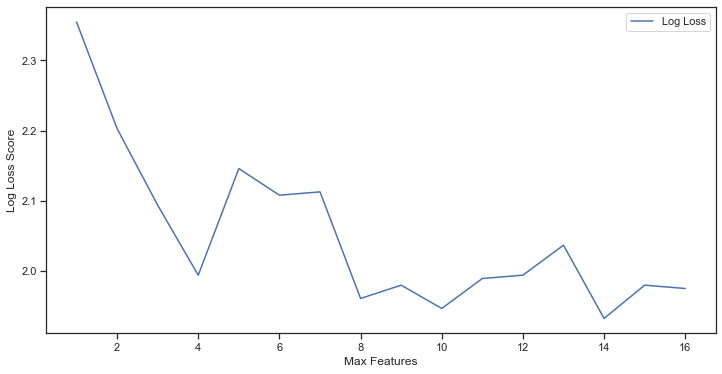

In [45]:
max_features = list(range(1, X_train_resampled.shape[1]))
log_loss_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(
        max_features=max_feature,
        random_state=42)
    dt.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    dt_log_loss = cross_val_score(
        dt, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    dtlog_loss = -(dt_log_loss.mean())
    log_loss_results.append(dtlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Max Features")
plt.legend()
plt.show()

In [46]:
"""7 is the best parameter for max features"""

'7 is the best parameter for max features'

In [47]:
dt_first_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=16,
    min_samples_leaf=10,
    max_features=7)
dt_first_neg_log_loss_cv = -cross_val_score(
    dt_first_model,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
dt_first_neg_log_loss_cv.mean()

0.377518507941313

In [48]:
dt_first_model.fit(X_train_resampled, y_train_resampled)
preds = dt_first_model.predict(X_test)
print("Decision Tree First Model:")
print_metrics(y_test, preds)

Decision Tree First Model:
Accuracy Score: 0.7081377151799687
Precision Score: 0.10230179028132992
Recall Score: 0.6451612903225806
F1 Score: 0.17660044150110377


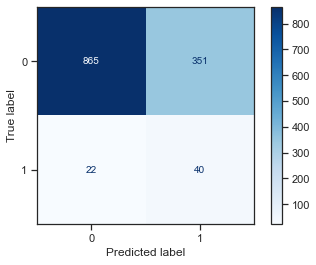

In [49]:
plot_confusion_matrix(dt_first_model, X_test, y_test, cmap = plt.cm.Blues);

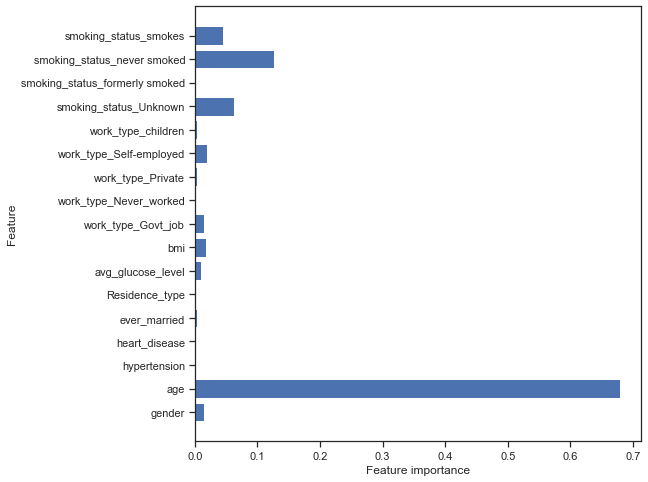

In [50]:
plot_feature_importances(dt_first_model)

Best Models so Far:

|                   | Log Loss | Accuracy | Precision | Recall | F1 Score |
|-------------------|----------|----------|-----------|--------|----------|
| Logreg Best Model | 0.181    | 0.927    | 0.262     | 0.274  | 0.268    |
| DT Baseline Model | 0.181    | 0.900    | 0.116     | 0.161  | 0.135    |

In [66]:
from sklearn.ensemble import BaggingClassifier
bagged_tree_baseline = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=75)
bagged_tree_baseline_neg_log_loss_cv = -cross_val_score(
    bagged_tree_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
bagged_tree_baseline_neg_log_loss_cv.mean()

0.1714023226067402

In [67]:
bagged_tree_baseline.fit(X_train_resampled, y_train_resampled)
preds = bagged_tree_baseline.predict(X_test)
print("Bagged Tree Baseline Model:")
print_metrics(y_test, preds)

Bagged Tree Baseline Model:
Accuracy Score: 0.9327073552425665
Precision Score: 0.18421052631578946
Recall Score: 0.11290322580645161
F1 Score: 0.14


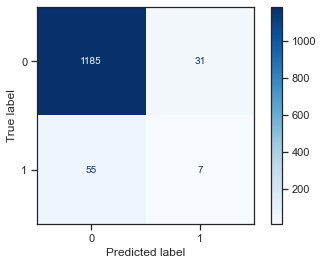

In [68]:
plot_confusion_matrix(bagged_tree_baseline, X_test, y_test, cmap = plt.cm.Blues);

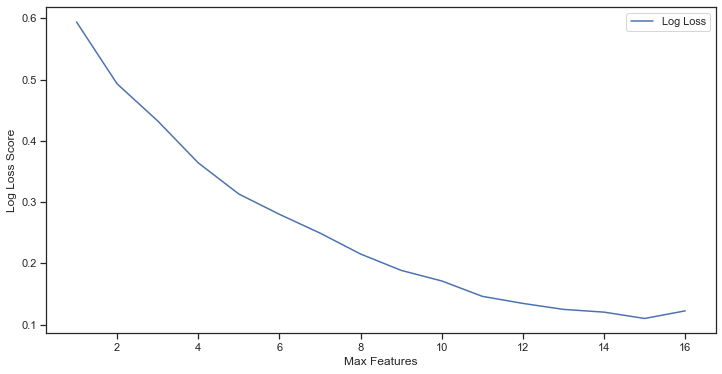

In [69]:
max_features = list(range(1, X_train_resampled.shape[1]))
log_loss_results = []
for max_feature in max_features:
    bagged_best = BaggingClassifier(DecisionTreeClassifier(random_state=42),
                                    n_estimators=75,
                                    max_features=max_feature)
    bagged_best.fit(X_train_resampled, y_train_resampled)
    y_pred = dt.predict(X_test)
    bagged_log_loss = cross_val_score(
        bagged_best, 
        X_train_resampled,
        y_train_resampled,
        scoring='neg_log_loss')
    baggedlog_loss = -(bagged_log_loss.mean())
    log_loss_results.append(baggedlog_loss)
    
plt.figure(figsize=(12,6))
plt.plot(max_features, log_loss_results, label='Log Loss')
plt.ylabel('Log Loss Score')
plt.xlabel("Max Features")
plt.legend()
plt.show()

In [70]:
bagged_tree_tuned = BaggingClassifier(DecisionTreeClassifier(random_state=42), n_estimators=75, max_features=15)
bagged_tree_tuned_neg_log_loss_cv = -cross_val_score(
    bagged_tree_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
bagged_tree_tuned_neg_log_loss_cv.mean()

0.12205290305554875

In [71]:
bagged_tree_tuned.fit(X_train_resampled, y_train_resampled)
preds = bagged_tree_tuned.predict(X_test)
print("Bagged Tree Tuned Model:")
print_metrics(y_test, preds)

Bagged Tree Tuned Model:
Accuracy Score: 0.9366197183098591
Precision Score: 0.1724137931034483
Recall Score: 0.08064516129032258
F1 Score: 0.1098901098901099


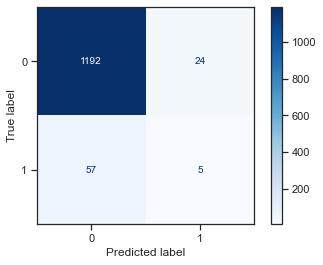

In [72]:
plot_confusion_matrix(bagged_tree_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [82]:
from sklearn.ensemble import RandomForestClassifier
forest_baseline = RandomForestClassifier(random_state=42)
forest_baseline_neg_log_loss_cv = -cross_val_score(
    forest_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
forest_baseline_neg_log_loss_cv.mean()

0.11506554322716082

In [83]:
forest_baseline.fit(X_train_resampled, y_train_resampled)
preds = forest_baseline.predict(X_test)
print("Random Forest Baseline Model:")
print_metrics(y_test, preds)

Random Forest Baseline Model:
Accuracy Score: 0.9374021909233177
Precision Score: 0.15384615384615385
Recall Score: 0.06451612903225806
F1 Score: 0.09090909090909091


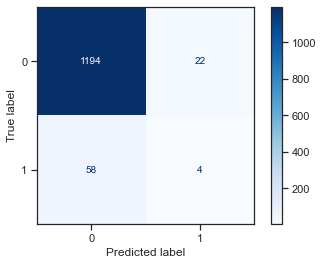

In [84]:
plot_confusion_matrix(forest_baseline, X_test, y_test, cmap = plt.cm.Blues);

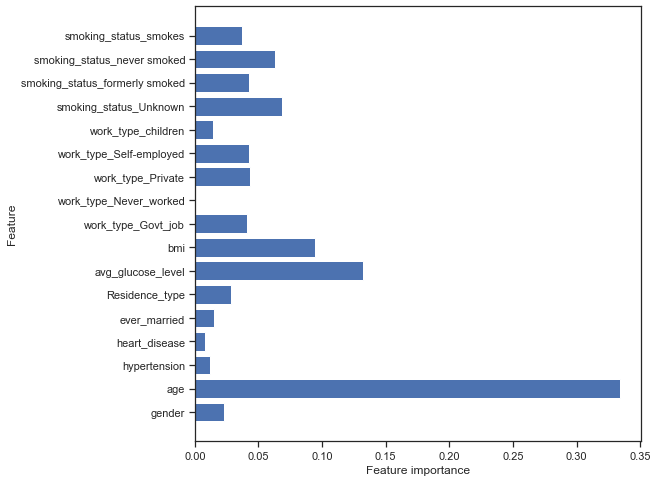

In [85]:
plot_feature_importances(forest_baseline)

In [86]:
forest_tuned = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators' : [100, 200, 300],
              'criterion' : ['gini', 'entropy', 'log_loss'],
              'max_features' : [10, 20, 30]}
    
grid_search = GridSearchCV(estimator = forest_tuned,
                           param_grid = param_grid,
                           cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': [10, 20, 30],
                         'n_estimators': [100, 200, 300]})

In [87]:
grid_search.best_params_

{'criterion': 'gini', 'max_features': 10, 'n_estimators': 200}

In [89]:
random_forest_tuned = RandomForestClassifier(random_state=42, max_features=10, n_estimators=200)
random_forest_tuned_neg_log_loss_cv = -cross_val_score(
    random_forest_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
random_forest_tuned_neg_log_loss_cv.mean()

0.10191129917958971

In [90]:
random_forest_tuned.fit(X_train_resampled, y_train_resampled)
preds = random_forest_tuned.predict(X_test)
print("Random Forest Tuned Model:")
print_metrics(y_test, preds)

Random Forest Tuned Model:
Accuracy Score: 0.935054773082942
Precision Score: 0.13793103448275862
Recall Score: 0.06451612903225806
F1 Score: 0.08791208791208792


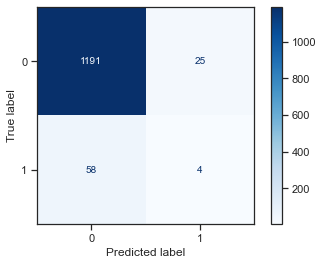

In [91]:
plot_confusion_matrix(random_forest_tuned, X_test, y_test, cmap = plt.cm.Blues);

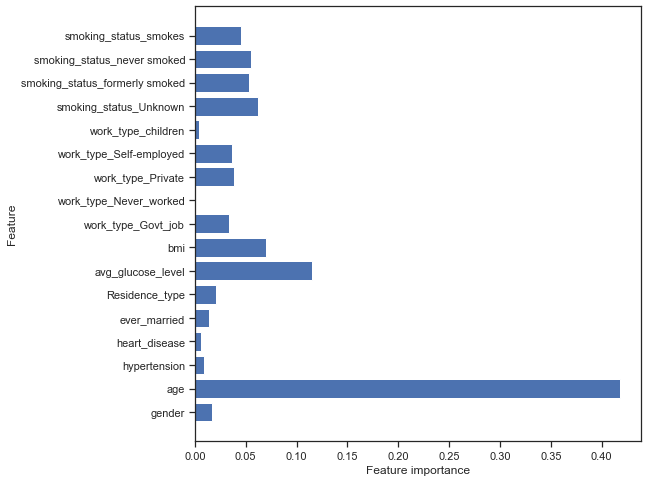

In [92]:
plot_feature_importances(random_forest_tuned)

In [93]:
from xgboost import XGBClassifier
xgb_baseline = XGBClassifier(random_state=42)
xgb_baseline_neg_log_loss_cv = -cross_val_score(
    xgb_baseline,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
xgb_baseline_neg_log_loss_cv.mean()

0.12523332183192892

In [94]:
xgb_baseline.fit(X_train_resampled, y_train_resampled)
preds = xgb_baseline.predict(X_test)
print("XGBoost Baseline Model:")
print_metrics(y_test, preds)

XGBoost Baseline Model:
Accuracy Score: 0.9374021909233177
Precision Score: 0.21875
Recall Score: 0.11290322580645161
F1 Score: 0.14893617021276595


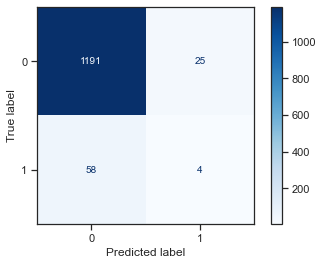

In [101]:
plot_confusion_matrix(random_forest_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [96]:
xgb_tuned = XGBClassifier(random_state=42)
param_grid = {'learning_rate' : [0.1, 0.2],
              'max_depth' : [6],
              'min_child_weight' : [1, 2],
              'subsample' : [0.5, 0.7],
              'n_estimators' : [100]}
    
grid_search = GridSearchCV(estimator = xgb_tuned,
                           param_grid = param_grid,
                           cv = 3)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [97]:
grid_search.best_params_

{'learning_rate': 0.2,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.7}

In [98]:
xgb_tuned = XGBClassifier(random_state=42,
                          learning_rate=0.2,
                          max_depth=6,
                          min_child_weight=1,
                          n_estimators=100,
                          subsample=0.7)
xgb_tuned_neg_log_loss_cv = -cross_val_score(
    xgb_tuned,
    X_train_resampled,
    y_train_resampled,
    scoring='neg_log_loss')
xgb_tuned_neg_log_loss_cv.mean()

0.11555017336984415

In [99]:
xgb_tuned.fit(X_train_resampled, y_train_resampled)
preds = xgb_tuned.predict(X_test)
print("XGBoost Tuned Model:")
print_metrics(y_test, preds)

XGBoost Tuned Model:
Accuracy Score: 0.9295774647887324
Precision Score: 0.13157894736842105
Recall Score: 0.08064516129032258
F1 Score: 0.09999999999999999


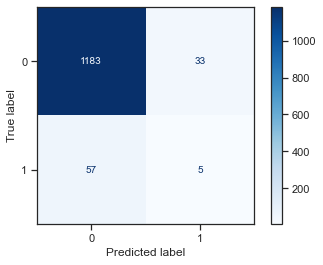

In [102]:
plot_confusion_matrix(xgb_tuned, X_test, y_test, cmap = plt.cm.Blues);

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

In [ ]:
knn_baseline_model.fit(X_train_scaled, y_train)
knn_preds = knn_baseline_model.predict(X_test_scaled)
print("KNN Baseline Model")
print_metrics(y_test, knn_preds)

In [ ]:
knn_first_model = KNeighborsClassifier(n_neighbors=100)
knn_first_log_loss = -cross_val_score(
    knn_first_model,
    X_train_scaled,
    y_train,
    scoring='neg_log_loss').mean()
knn_first_log_loss

In [ ]:
knn_second_model = KNeighborsClassifier(n_neighbors=200)
knn_second_log_loss = -cross_val_score(
    knn_second_model,
    X_train_scaled,
    y_train,
    scoring='neg_log_loss').mean()
knn_second_log_loss

In [ ]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=100, max_k=200):
    best_k = 0
    best_score = 1.00
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        log_loss = -cross_val_score(
            knn,
            X_train,
            y_train, 
            scoring='neg_log_loss').mean()
        if log_loss < best_score:
            best_k = k
            best_score = log_loss
    print("Best Value for k: {}".format(best_k))
    print("Log Loss: {}".format(best_score))

In [ ]:
find_best_k(X_train_scaled, y_train, X_test_scaled, y_test)

In [ ]:
knn_best_model = KNeighborsClassifier(n_neighbors=144)
knn_best_log_loss = -cross_val_score(
    knn_best_model,
    X_train_scaled,
    y_train,
    scoring='neg_log_loss').mean()
print(knn_second_log_loss)
knn_best_model.fit(X_train_scaled, y_train)
preds = knn_best_model.predict(X_test_scaled)
print_metrics(y_test, preds)